In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
bi_df = pd.read_csv('../Model Data/multi_outcome_with_stock.csv')
print(bi_df.dtypes)
bi_df.head()

Unnamed: 0           int64
Unnamed: 0.1         int64
Date                object
Multi_Class         object
Search Date         object
                    ...   
AZN_Volume         float64
 NVAX_Open         float64
 NVAX_Close        float64
NVAX_Difference    float64
NVAX_Volume        float64
Length: 107, dtype: object


,Unnamed: 0,Unnamed: 0.1,Date,Multi_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
0,0,0,2022-02-23,1699-5000,2022-02-13,39,73,27,29,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2022-02-22,1699-5000,2022-02-12,33,76,28,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2022-02-21,550-1698,2022-02-11,46,86,47,27,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2022-02-20,0-549,2022-02-10,40,86,38,27,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2022-02-19,0-549,2022-02-09,44,88,41,23,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bi_df = bi_df.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Search Date', 'Date'})
bi_df = bi_df.dropna()
bi_df.head()

,Multi_Class,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,flu symptoms,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
12,1699-5000,43,88,17,23,70,14,80,32,8,...,-0.45,34970000.0,58.08,58.04,0.04,9038200.0,90.16,90.44,-0.28,4131200.0
13,1699-5000,42,90,45,25,72,14,71,38,9,...,0.44,34200600.0,58.16,58.60,-0.44,14540200.0,87.18,88.00,-0.82,4925700.0
14,1699-5000,39,75,100,35,52,14,81,38,9,...,0.17,38522200.0,56.99,57.20,-0.21,5571100.0,84.08,91.79,-7.71,5341100.0
15,1699-5000,30,73,46,27,46,12,76,29,9,...,-1.06,67922000.0,56.55,56.65,-0.10,7632300.0,85.02,83.45,1.57,9114900.0
16,1699-5000,43,76,40,26,59,18,63,31,8,...,0.09,32358500.0,56.19,56.68,-0.49,7816900.0,90.36,94.80,-4.44,6481200.0


In [5]:
bi_df.select_dtypes(exclude=[np.number])

,Multi_Class,DJIA_Open,DJIA_Close,DJIA_Difference,DJIA_Volume
12,1699-5000,"35,267.89","34,738.06",529.83,"398,860,000"
13,1699-5000,"35,630.81","35,241.59",389.22,"411,620,000"
14,1699-5000,"35,614.90","35,768.06",-153.16,"333,610,000"
15,1699-5000,"35,160.68","35,462.78",-302.1,"319,190,000"
16,1699-5000,"35,108.38","35,091.13",17.25,"328,910,000"
...,...,...,...,...,...
747,0-549,"29,286.92","29,102.51",184.41,"252,860,000"
748,0-549,"29,388.58","29,379.77",8.81,"263,700,000"
749,0-549,"29,048.73","29,290.85",-242.12,"357,540,000"
750,0-549,"28,696.74","28,807.63",-110.89,"332,750,000"


In [6]:
#change data types from str to numeric
bi_df['DJIA_Open'] = pd.to_numeric(bi_df['DJIA_Open'],
                                     errors = 'coerce')
bi_df['DJIA_Close'] = pd.to_numeric(bi_df['DJIA_Close'],
                                     errors = 'coerce')
bi_df['DJIA_Difference'] = pd.to_numeric(bi_df['DJIA_Difference'],
                                     errors = 'coerce')
bi_df['DJIA_Volume'] = pd.to_numeric(bi_df['DJIA_Volume'],
                                     errors = 'coerce')

In [7]:
bi_df.select_dtypes(exclude=[np.number])

,Multi_Class
12,1699-5000
13,1699-5000
14,1699-5000
15,1699-5000
16,1699-5000
...,...
747,0-549
748,0-549
749,0-549
750,0-549


In [8]:
# bi_df = bi_df[bi_df.columns.drop(list(bi_df.filter(regex='Volume')))]
bi_df = bi_df[bi_df.columns.drop(list(bi_df.filter(regex='DJIA')))]


In [9]:
bi_df.select_dtypes(include=[np.number]).columns

Index(['alcoholism', 'anxiety', 'athleisure', 'cutting hair', 'depression',
       'dry cough', 'eczema', 'fever', 'flu symptoms', 'lack of smell',
       'lack of taste', 'long-term care', 'mask mandates', 'obamacare',
       'opiods', 'peloton', 'quarantine', 'short-term disability', 'star trek',
       'telehealth', 'teslas', 'unemployment insurance', 'vaping', 'xanax',
       'zoom', 'covid symptoms', 'hospitals near me', 'baconator', 'helmet',
       'aluminium', 'plane', 'age', 'hen', 'table', 'digital', 'mutation',
       'oppose', 'city', 'athlete', 'prediction', 'tumble', 'stroke',
       'diabetes', 'lungs', 'ivermectin', 'hydroxychloroquine', 'bleach',
       'lake', 'toilet paper', 'stimulus', 'vaccines near me',
       'vaccine side effects', 'how to get my taste back', 'anti-depressant',
       'mental health', 'can dogs get covid', 'doritos locos tacos',
       'best hikes near me', 'tiktok', 'jeff bezos net worth',
       'what is ivermectin', 'what is mrna', 'bill gate

In [10]:
# bi_df = bi_df.dropna()
bi_df.select_dtypes(include=['float64'])

,covid symptoms,hospitals near me,baconator,helmet,aluminium,plane,age,hen,table,digital,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
12,19.0,50.0,19.0,70.0,32.0,24.0,47.0,17.0,66.0,67.0,...,-0.45,34970000.0,58.08,58.04,0.04,9038200.0,90.16,90.44,-0.28,4131200.0
13,24.0,53.0,11.0,59.0,27.0,25.0,50.0,16.0,63.0,70.0,...,0.44,34200600.0,58.16,58.60,-0.44,14540200.0,87.18,88.00,-0.82,4925700.0
14,22.0,71.0,20.0,79.0,28.0,24.0,55.0,15.0,62.0,60.0,...,0.17,38522200.0,56.99,57.20,-0.21,5571100.0,84.08,91.79,-7.71,5341100.0
15,22.0,55.0,21.0,79.0,18.0,25.0,65.0,22.0,65.0,56.0,...,-1.06,67922000.0,56.55,56.65,-0.10,7632300.0,85.02,83.45,1.57,9114900.0
16,23.0,60.0,18.0,67.0,25.0,23.0,61.0,18.0,62.0,58.0,...,0.09,32358500.0,56.19,56.68,-0.49,7816900.0,90.36,94.80,-4.44,6481200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0.0,56.0,14.0,56.0,28.0,44.0,43.0,15.0,65.0,63.0,...,0.29,21903596.0,49.89,49.40,0.49,1995500.0,6.76,6.31,0.45,2607200.0
748,0.0,51.0,16.0,58.0,23.0,55.0,46.0,15.0,67.0,63.0,...,0.17,21047748.0,49.69,50.03,-0.34,2531000.0,6.89,6.84,0.05,1457600.0
749,0.0,55.0,14.0,50.0,28.0,100.0,58.0,14.0,65.0,59.0,...,-0.30,29443490.0,49.46,49.73,-0.27,2303000.0,6.90,6.97,-0.07,2158500.0
750,0.0,44.0,14.0,59.0,21.0,87.0,62.0,18.0,60.0,52.0,...,0.37,31150865.0,48.76,48.76,0.00,1698800.0,6.63,7.01,-0.38,4168300.0


In [11]:
X = bi_df.drop(columns=['Multi_Class'])
y = bi_df['Multi_Class']
# target_names = ["High", "Low"]

In [12]:
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Data Modeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42)

In [14]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.875968992248062


In [16]:
feature_importances = rfc.feature_importances_

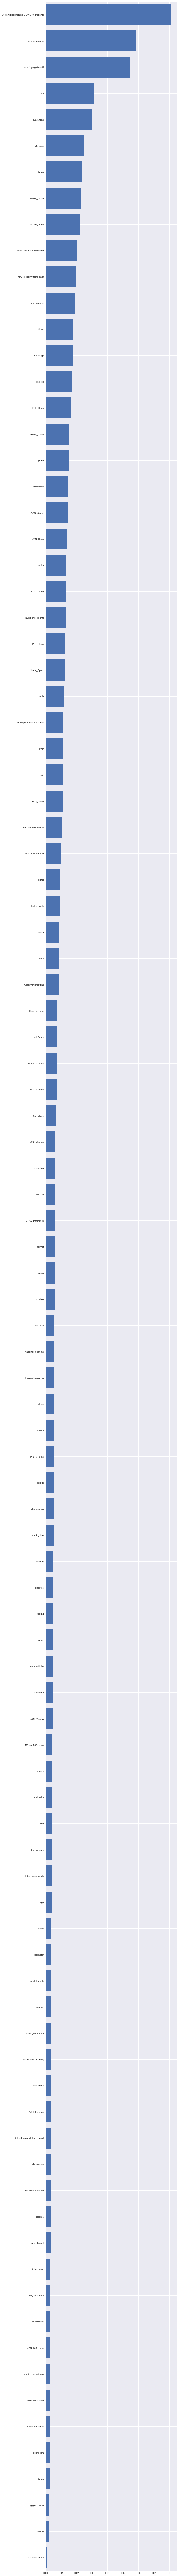

In [17]:
features = sorted(zip(X.columns, rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

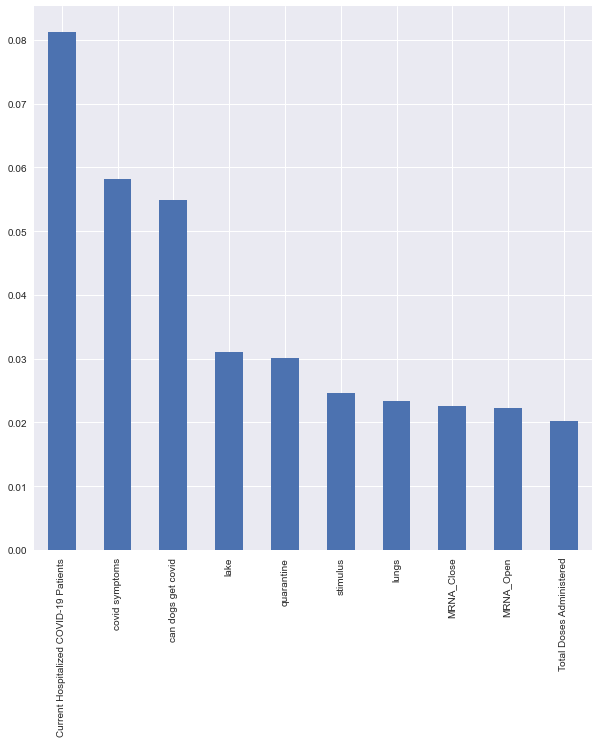

In [22]:
feat_plot=pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(10).sort_values(ascending=False)[:200].plot(kind='bar', figsize=(10,10))


In [23]:
feat_plot.to_png('RFC_Multi_Top_10_Features.png')

AttributeError: 'AxesSubplot' object has no attribute 'to_png'